In [26]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
from keras import datasets
import matplotlib.pyplot as plt

In [27]:
# Declaring training Parameter
VAl_RATIO = 0.2
BATCH_SIZE = 128
VERBOSE = 1
OUTPUT_CLASSES = 10
HIDDEN = 10
EPOCHS = 200
RESHAPED = 784
DROPOUT = 0.3

In [28]:
mnist = datasets.mnist
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

In [29]:
print(X_train.shape)
print(Y_train.shape)

(60000, 28, 28)
(60000,)


In [30]:
print(X_test.shape)
print(Y_test.shape)

(10000, 28, 28)
(10000,)


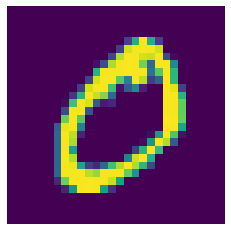

0


In [31]:
plt.imshow(X_train[1])
plt.axis('off')
plt.show()

print(Y_train[1])

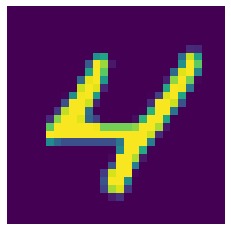

4


In [32]:
plt.imshow(X_train[4097])
plt.axis('off')
plt.show()

print(Y_train[4097])

In [33]:
X_train = X_train.reshape(X_train.shape[0], RESHAPED)
X_test = X_test.reshape(X_test.shape[0], RESHAPED)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255.0
X_test /= 255.0

In [34]:
Y_train = tf.keras.utils.to_categorical(Y_train, OUTPUT_CLASSES)
Y_test = tf.keras.utils.to_categorical(Y_test, OUTPUT_CLASSES)

In [35]:
model = tf.keras.models.Sequential()
model.add(keras.layers.Dense(HIDDEN,
                             input_shape=(RESHAPED,),
                             name='dense_layer', activation='relu'))
model.add(keras.layers.Dropout(DROPOUT))
model.add(keras.layers.Dense(HIDDEN,
                             name='dense_layer_2', activation='relu'))
model.add(keras.layers.Dropout(DROPOUT))
model.add(keras.layers.Dense(OUTPUT_CLASSES,
                             name='dense_layer_3', activation='softmax'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_layer (Dense)         (None, 10)                7850      
                                                                 
 dropout_6 (Dropout)         (None, 10)                0         
                                                                 
 dense_layer_2 (Dense)       (None, 10)                110       
                                                                 
 dropout_7 (Dropout)         (None, 10)                0         
                                                                 
 dense_layer_3 (Dense)       (None, 10)                110       
                                                                 
Total params: 8,070
Trainable params: 8,070
Non-trainable params: 0
_________________________________________________________________


In [36]:
model.compile(optimizer='SGD', loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(X_train, Y_train, batch_size=BATCH_SIZE, epochs=EPOCHS, verbose=VERBOSE, validation_split=VAl_RATIO)

Epoch 1/200
375/375 [==============================] - 4s 7ms/step - loss: 2.2234 - accuracy: 0.1616 - val_loss: 1.9982 - val_accuracy: 0.3758
Epoch 2/200
375/375 [==============================] - 2s 5ms/step - loss: 1.9604 - accuracy: 0.3025 - val_loss: 1.6217 - val_accuracy: 0.5815
Epoch 3/200
375/375 [==============================] - 2s 6ms/step - loss: 1.7572 - accuracy: 0.3908 - val_loss: 1.3983 - val_accuracy: 0.6557
Epoch 4/200
375/375 [==============================] - 2s 5ms/step - loss: 1.6338 - accuracy: 0.4375 - val_loss: 1.2534 - val_accuracy: 0.6953
Epoch 5/200
375/375 [==============================] - 2s 6ms/step - loss: 1.5596 - accuracy: 0.4605 - val_loss: 1.1580 - val_accuracy: 0.7293
Epoch 6/200
375/375 [==============================] - 2s 6ms/step - loss: 1.4868 - accuracy: 0.4862 - val_loss: 1.0577 - val_accuracy: 0.7578
Epoch 7/200
375/375 [==============================] - 2s 5ms/step - loss: 1.4337 - accuracy: 0.4983 - val_loss: 0.9762 - val_accuracy: 0.7781

In [37]:
test_loss, test_acc = model.evaluate(X_test, Y_test)
print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.4445 - accuracy: 0.9052
Test accuracy: 0.9052000045776367
